Exploratory Principal Component Analysis for Kaggle Ames Iowa Housing Prices Competition

Libraries necessary for the work

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=1.2) #adopting James' convention

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import pylab 
import scipy.stats as stats

from scipy.stats import skew
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import cross_val_score

In [2]:
ls

Datasets/
Exploratory_PCA_dmb-WenchangData.ipynb
Exploratory_PCA_dmb.ipynb
FractalDimensionWaveform-KaggleHousing.ipynb
ML_Project_KM.ipynb
README.MD
Wenchang_Qian_Kaggle_Ames_Iowa_Housing_Price_Prediction.ipynb
james_proj3.ipynb
jamesczq_baseline_regressions.ipynb


In [3]:
# Read in train and test sets
train = pd.read_csv('Datasets/train_Wenchang.csv')
test = pd.read_csv('Datasets/test_Wenchang.csv')

In [4]:
#following James's approach 
# Concat. train[no ID column, ... (all columns) ..., no SalePrice column]
#     with test[no ID column, ... (all columns) ..., no SalePrice column]
# (Test data has no SalePrice column anyway)
# we will log xform overly skewed variables

train_test = pd.concat([train.loc[:,'MSSubClass':'SaleCondition'],
                         test.loc[:,'MSSubClass':'SaleCondition']]);

train_test.shape

# deal with skew through log x-formation, add one to argument
train.SalePrice = np.log(1 + train.SalePrice)

# we have selected a skew value of 0.6 to be our threshold 

# Likewise, log transform those skewed numeric features
from scipy.stats import skew

# Set the threshold for being over-skewed
# (can tune later)
skew0 = 0.6;
numeric_features = train_test.dtypes[train_test.dtypes != "object"].index

skewed_features = train[numeric_features].apply(lambda x: skew(x.dropna())) 
skewed_features = skewed_features[abs( skewed_features ) > skew0]
skewed_features = skewed_features.index
train_test[skewed_features] = np.log(1 + train_test[skewed_features])

In [5]:
train_test = pd.get_dummies(train_test)
# filling in NAs - we agreed to impute w/ median
#save copy of data 
train_test.to_csv('./Datasets/train_test.csv')

In [6]:
X_train = train_test[:train.shape[0]].reset_index(drop = True)
X_test  = train_test[train.shape[0]:]
Y_train = train.SalePrice

In [7]:
X_train.head()

,MSSubClass,MasVnrArea,MoSold,OpenPorchSF,OverallCond,OverallQual,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,5.283204,2,4.127134,1.791759,7,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,3.044522,0.000000,5,0.000000,2.197225,6,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,4.110874,5.093750,9,3.761200,1.791759,7,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,4.262680,0.000000,2,3.583519,1.791759,7,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,4.110874,5.860786,12,4.442651,1.791759,8,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [8]:
X_train.max()
X_train.isnull().values.any()

False

In [9]:
X_pca = RobustScaler().fit_transform(X_train)

In [10]:
type(X_pca)

numpy.ndarray

In [11]:
np.size(X_train,1)

60

In [12]:
pca = PCA(n_components=30).fit(X_pca)

X_pca = pca.transform(X_pca)

In [13]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

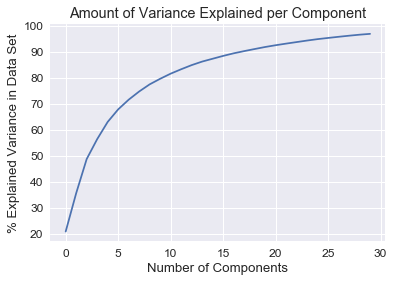

In [14]:
plt.plot(var)
plt.ylabel('% Explained Variance in Data Set')
plt.xlabel('Number of Components')
plt.title('Amount of Variance Explained per Component')
plt.show()

In [15]:
X_train.keys()

Index(['MSSubClass', 'MasVnrArea', 'MoSold', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'MasVnrType_BrkCmn', 'MasVnrType_BrkFace',
       'MasVnrType_None', 'MasVnrType_Stone', 'MiscFeature_Gar2',
       'MiscFeature_None', 'MiscFeature_Othr', 'MiscFeature_Shed',
       'MiscFeature_TenC', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood

In [16]:
pca.explained_variance_ratio_

array([0.20998785, 0.14718027, 0.13112039, 0.07650312, 0.06607267,
       0.04817942, 0.03719011, 0.03149701, 0.02735792, 0.02137295,
       0.0196952 , 0.01689561, 0.01594786, 0.01362561, 0.01094777,
       0.01089387, 0.00987953, 0.00847756, 0.00800996, 0.0078445 ,
       0.00683618, 0.00621398, 0.00592421, 0.00587337, 0.00544083,
       0.00458332, 0.00440076, 0.0042376 , 0.00385292, 0.00323014])

In [17]:
def component_results(data, pca):
    modes = ['Mode {}'.format(i) for i in range(1,len(pca.components_) + 1)]
    components = pd.DataFrame(np.round(pca.components_,4), columns = data.keys())
    components.index = modes
    # variance explained
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = modes
    
    # too many modes currently for plot to be useful
    # Plot the feature weights as a function of the components
    # components.plot(ax = ax, kind = 'bar')
    # ax.set_ylabel("Feature Weights") 
    # ax.set_xticklabels(modes, rotation=0)
    
    # Display the explained variance ratios# 
    # for i, ev in enumerate(pca.explained_variance_ratio_): 
        # ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))
    
    # Display the explained variance ratios
    # for i, ev in enumerate(pca.explained_variance_ratio_): 
        # ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))
    
    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

In [18]:
component_results = component_results(X_train, pca)

In [19]:
component_results.to_csv('./Datasets/eigenvectors.csv')

In [20]:
component_results.iloc[0:30,0].cumsum()

Mode 1     0.2100
Mode 2     0.3572
Mode 3     0.4883
Mode 4     0.5648
Mode 5     0.6309
Mode 6     0.6791
Mode 7     0.7163
Mode 8     0.7478
Mode 9     0.7752
Mode 10    0.7966
Mode 11    0.8163
Mode 12    0.8332
Mode 13    0.8491
Mode 14    0.8627
Mode 15    0.8736
Mode 16    0.8845
Mode 17    0.8944
Mode 18    0.9029
Mode 19    0.9109
Mode 20    0.9187
Mode 21    0.9255
Mode 22    0.9317
Mode 23    0.9376
Mode 24    0.9435
Mode 25    0.9489
Mode 26    0.9535
Mode 27    0.9579
Mode 28    0.9621
Mode 29    0.9660
Mode 30    0.9692
Name: Explained Variance, dtype: float64

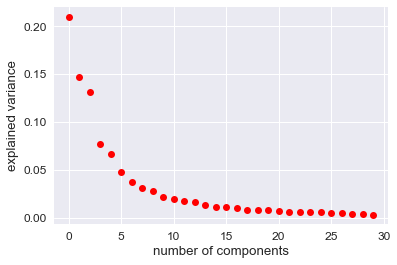

In [21]:
#Explained variance
plt.plot(pca.explained_variance_ratio_, 'ro')
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [22]:
pca.components_

array([[ 1.90928878e-02,  1.82766905e-01,  5.26653156e-02, ...,
         1.98948411e-03, -7.51453766e-02,  6.17919307e-02],
       [ 1.03026842e-02, -3.46963309e-01, -4.89287203e-01, ...,
         1.92494560e-03,  3.65608948e-02, -6.97933709e-02],
       [ 2.46799079e-02, -2.43823479e-01,  8.63696855e-01, ...,
         1.84159735e-03, -2.05953855e-02, -5.00218926e-03],
       ...,
       [ 1.06150560e-02,  7.56320263e-02, -1.08096815e-04, ...,
        -8.21176459e-02,  1.36058442e-02,  8.40548964e-02],
       [-1.74931605e-02,  2.56041694e-02, -6.78713264e-03, ...,
         5.15352758e-03, -1.70231961e-02, -2.71226185e-02],
       [-4.23236020e-02,  4.21492848e-02, -1.82851305e-03, ...,
        -8.22557219e-02,  4.35695745e-02,  8.68313441e-02]])

Now, let's try to apply Linear, Ridge, and Lasso Models

In [23]:
# develop test of rmse to compare across models

def rmse_cv(model):
    rmse = np.sqrt( -cross_val_score(model, X_pca, Y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [24]:
houseRegr = LinearRegression()

In [25]:
houseRegr.fit(X_pca, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
hept_Y_pred = houseRegr.predict(X_pca)

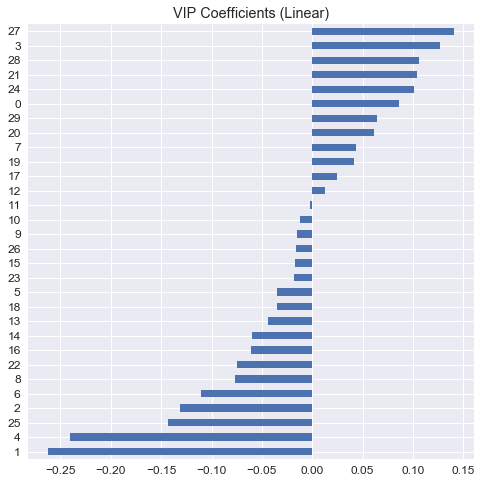

In [27]:
model_lin = houseRegr.fit(X_pca, Y_train);
coeffs_lin = pd.Series(model_lin.coef_, index = X_pca.dtype.names);
vip_coeffs_lin = pd.concat([coeffs_lin.sort_values().head(15),
                              coeffs_lin.sort_values().tail(15)])

fig, ax = plt.subplots(figsize=(8,8));
vip_coeffs_lin.plot(kind = "barh");
plt.title("VIP Coefficients (Linear)");

**************************************************
Ridge Performace: R^2 = 0.7702
**************************************************


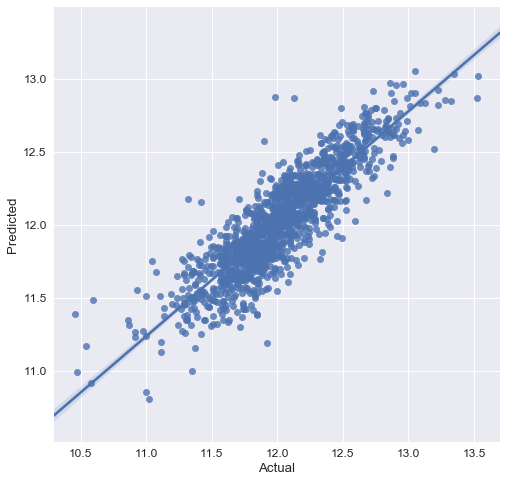

In [28]:
predictions_lin = pd.DataFrame({"Predicted":model_lin.predict(X_pca), 
                                  "Actual":Y_train});
predictions_lin["Residual"] = predictions_lin.Actual - predictions_lin.Predicted;


print('*'*50)
print('Ridge Performace: R^2 = {:.4f}'.format(model_lin.score(X_pca, Y_train)))
print('*'*50)


fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_lin.Actual, predictions_lin.Predicted);

In [29]:
model_Ridge = Ridge()

In [30]:
# keeping parameters same as James
# supply a log-ranged alphas from 10^(-2) to 10^(2)
# total: 60 alphas to do CV
alpha_array = np.logspace(-1,2,64)

cv_Ridge = [rmse_cv(Ridge(alpha = Alpha)).mean() for Alpha in alpha_array]

**************************************************
Ridge CV:
Minumum RMSE 0.1960 
achieved at alpha = 8.9615
**************************************************


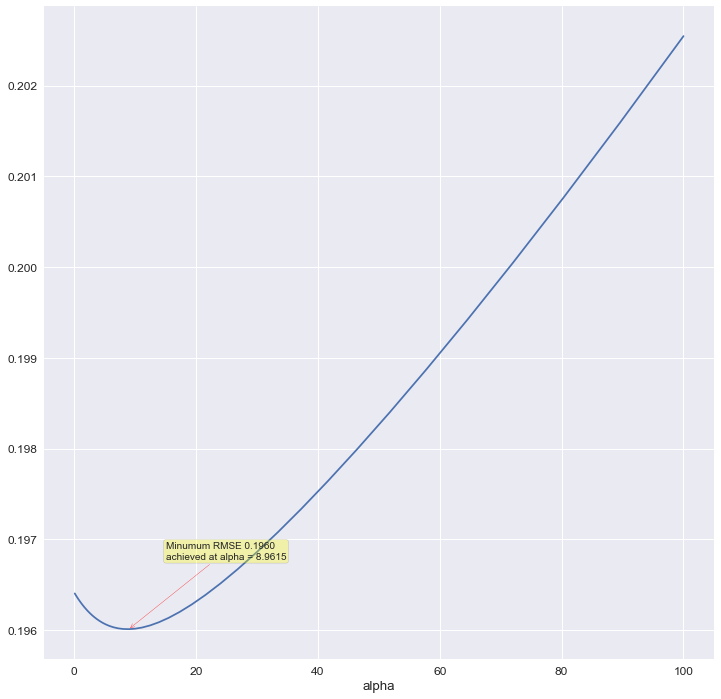

In [31]:
cv_Ridge = pd.Series(cv_Ridge, index = alpha_array)

fig, ax = plt.subplots(figsize=(12,12));
ax.plot(alpha_array,cv_Ridge);
ax.set_xlabel('alpha')
#ax.set_ylabel('RMSE')
alpha0 = cv_Ridge[cv_Ridge == cv_Ridge.min()].index[0];
rmse0 = cv_Ridge.min();
s = 'Minumum RMSE {:.4f} \nachieved at alpha = {:.4f}'.format(rmse0,alpha0)
ax.annotate(s, xy=(alpha0, rmse0),
               xycoords='data',
               xytext=(alpha_array.mean(), cv_Ridge.mean()),
               #textcoords='offset points',
               bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
               arrowprops=dict(arrowstyle='->',color='red'))

print('*'*50)
print('Ridge CV:')
print(s)
print('*'*50)

In [32]:
len(X_pca)

1460

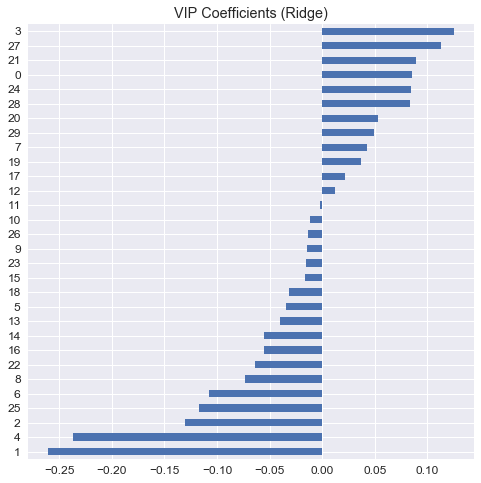

In [33]:
model_Ridge = Ridge(alpha0).fit(X_pca, Y_train);
coeffs_Ridge = pd.Series(model_Ridge.coef_, index = X_pca.dtype.names);
vip_coeffs_Ridge = pd.concat([coeffs_Ridge.sort_values().head(15),
                              coeffs_Ridge.sort_values().tail(15)])

fig, ax = plt.subplots(figsize=(8,8));
vip_coeffs_Ridge.plot(kind = "barh");
plt.title("VIP Coefficients (Ridge)");

**************************************************
Ridge Performace: R^2 = 0.7696
**************************************************


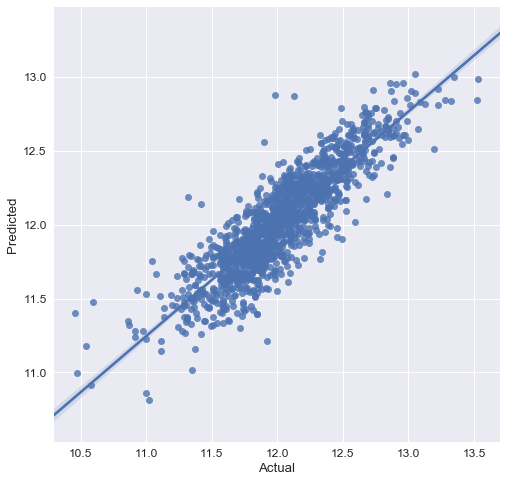

In [34]:
predictions_Ridge = pd.DataFrame({"Predicted":model_Ridge.predict(X_pca), 
                                  "Actual":Y_train});
predictions_Ridge["Residual"] = predictions_Ridge.Actual - predictions_Ridge.Predicted;


print('*'*50)
print('Ridge Performace: R^2 = {:.4f}'.format(model_Ridge.score(X_pca, Y_train)))
print('*'*50)


fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_Ridge.Actual, predictions_Ridge.Predicted);

In [35]:
model_Lasso = Lasso()
# supply a log-ranged alphas from 10^(-2) to 10^(2)
# total: 60 alphas to do CV
alpha_array = np.logspace(-4,-2,256)

cv_Lasso = [rmse_cv(Lasso(alpha = Alpha)).mean() for Alpha in alpha_array]

In [36]:
len(Y_train)

1460

**************************************************
Lasso CV:
Minumum RMSE 0.1962 
achieved at alpha = 0.0004
**************************************************


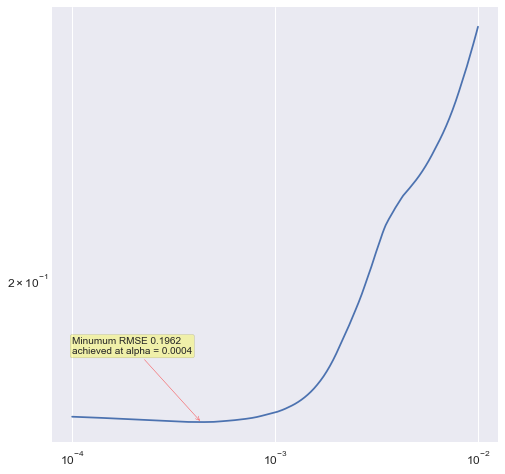

In [37]:
cv_Lasso = pd.Series(cv_Lasso, index = alpha_array)

fig, ax = plt.subplots(figsize=(8,8));
ax.loglog(alpha_array,cv_Lasso);
plt.grid(True);

alpha0 = cv_Lasso[cv_Lasso == cv_Lasso.min()].index[0];
rmse0 = cv_Lasso.min();
s = 'Minumum RMSE {:.4f} \nachieved at alpha = {:.4f}'.format(rmse0,alpha0)
ax.annotate(s, xy=(alpha0, rmse0),
               xycoords='data',
               xytext=(0.0001, 0.198),
               #textcoords='offset points',
               bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
               arrowprops=dict(arrowstyle='->',color='red'))

print('*'*50)
print('Lasso CV:')
print(s)
print('*'*50)

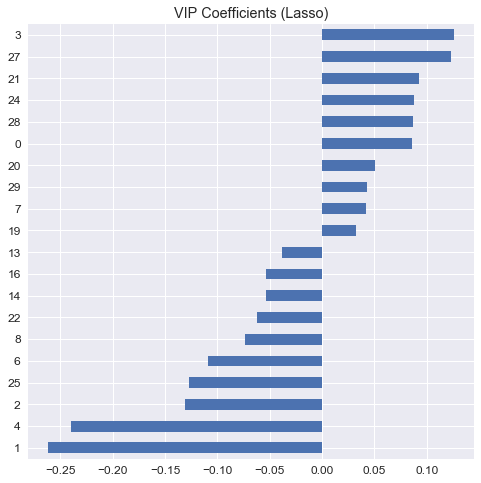

In [38]:
model_Lasso = Lasso(alpha0).fit(X_pca, Y_train);


coeffs_Lasso = pd.Series(model_Lasso.coef_, index = X_pca.dtype.names);
vip_coeffs_Lasso = pd.concat([coeffs_Lasso.sort_values().head(10),
                              coeffs_Lasso.sort_values().tail(10)])

fig, ax = plt.subplots(figsize=(8,8));
vip_coeffs_Lasso.plot(kind = "barh");
plt.title("VIP Coefficients (Lasso)");

**************************************************
Lasso Performace: R^2 = 0.7696
**************************************************


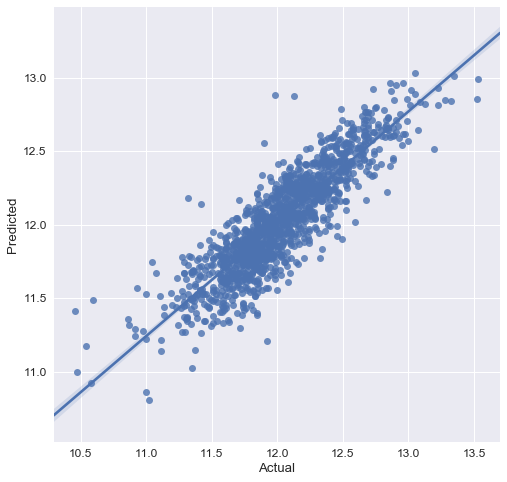

In [39]:
predictions_Lasso = pd.DataFrame({"Predicted":model_Lasso.predict(X_pca), 
                                  "Actual":Y_train});
predictions_Lasso["Residual"] = predictions_Lasso.Actual - predictions_Lasso.Predicted;


print('*'*50)
print('Lasso Performace: R^2 = {:.4f}'.format(model_Lasso.score(X_pca, Y_train)))
print('*'*50)


fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_Lasso.Actual, predictions_Lasso.Predicted);
#ax.set_title('')

Let's try elastic net

In [40]:
l1_search = np.arange(0.005, 1, step = 0.005)
model_elasticGrid = ElasticNetCV(l1_ratio = l1_search, n_alphas=100, cv =10).fit(X_pca, Y_train);

In [41]:
model_elasticGrid.score(X_pca, Y_train)

0.7695332425052568

In [42]:
rmse_cv(model_elasticGrid).min()

0.1808971303692658

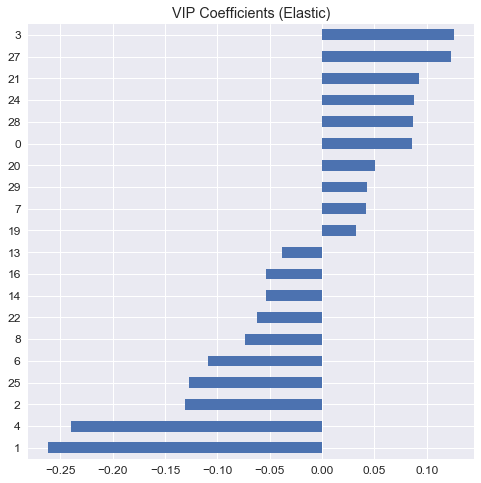

In [43]:
model_elasticGrid = ElasticNetCV(l1_ratio = l1_search, n_alphas=100, cv =10).fit(X_pca, Y_train);


coeffs_elastic = pd.Series(model_elasticGrid.coef_, index = X_pca.dtype.names);
vip_coeffs_elastic = pd.concat([coeffs_elastic.sort_values().head(10),
                              coeffs_elastic.sort_values().tail(10)])

fig, ax = plt.subplots(figsize=(8,8));
vip_coeffs_Lasso.plot(kind = "barh");
plt.title("VIP Coefficients (Elastic)");

**************************************************
Elastic Performace: R^2 = 0.7695
**************************************************


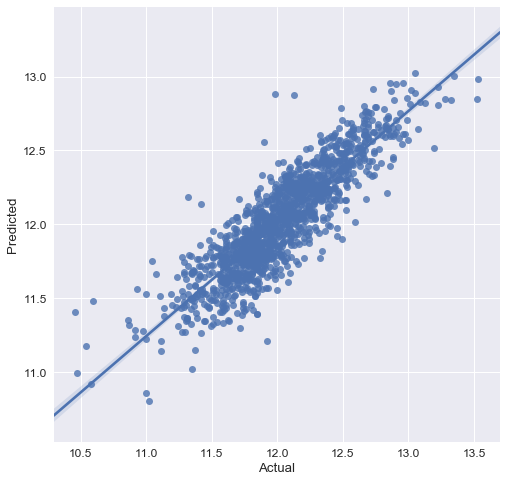

In [44]:
predictions_elastic = pd.DataFrame({"Predicted":model_elasticGrid.predict(X_pca), 
                                  "Actual":Y_train});
predictions_elastic["Residual"] = predictions_elastic.Actual - predictions_elastic.Predicted;


print('*'*50)
print('Elastic Performace: R^2 = {:.4f}'.format(model_elasticGrid.score(X_pca, Y_train)))
print('*'*50)


fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_elastic.Actual, predictions_elastic.Predicted);
#ax.set_title('')

Elastic has lower RMSE than either Ridge or Lasso, but R^2 is the same as Lasso and less than Ridge. 
VIP coefficients indistinguishable from Ridge

Now on to interpreting eigenmodes

In [49]:
component_results.iloc[3].sort_values()

MSZoning_RL             -0.3146
Neighborhood_NAmes      -0.2563
RoofStyle_Hip           -0.2212
MasVnrType_BrkFace      -0.1718
MasVnrArea              -0.1404
MoSold                  -0.0729
SaleCondition_Normal    -0.0654
Neighborhood_Sawyer     -0.0615
Neighborhood_Edwards    -0.0393
PavedDrive_Y            -0.0378
Neighborhood_NWAmes     -0.0343
MiscFeature_Shed        -0.0213
MasVnrType_BrkCmn       -0.0170
Neighborhood_Timber     -0.0105
Neighborhood_Mitchel    -0.0103
RoofStyle_Flat          -0.0074
SaleCondition_Abnorml   -0.0061
Neighborhood_ClearCr    -0.0027
MSZoning_C (all)        -0.0022
RoofStyle_Mansard       -0.0016
MiscFeature_Gar2        -0.0015
SaleCondition_AdjLand   -0.0008
SaleCondition_Family    -0.0007
RoofStyle_Shed          -0.0000
MiscFeature_Othr        -0.0000
MiscFeature_TenC         0.0001
SaleCondition_Alloca     0.0007
RoofStyle_Gambrel        0.0008
Neighborhood_Crawfor     0.0014
Neighborhood_CollgCr     0.0023
                          ...  
Neighbor

In [ ]:
components = component_results.T.sort_values(by = 'Mode 2')

In [ ]:
components.drop(['Explained Variance'], inplace = True)

In [ ]:
components.iloc[:,1]

In [ ]:
round(sum(list(map(lambda x: x**2, components.iloc[:,0]))))